In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
nonbasic_lemma_df = pd.read_csv('final_lemma_df.csv', sep = '|', index_col = 0)
nonbasic_lemma_df.head()

,rank,frequency,lemma,script,jlpt_level,pos,adjective,adverb,auxiliary verb,conjunction,noun,other,particle,prefix,symbol,verb,average_character_frequency,total_stroke_count,average_character_stroke_count
0,9,16841.17,する,hiragana,n5,['Suru verb - irregular'],0,0,0,0,0,0,0,0,0,1,736.5,3.0,1.5
1,11,9604.49,ます,hiragana,n5,"['Godan verb with su ending', 'intransitive ve...",0,0,0,0,0,0,0,0,0,1,281.0,5.0,2.5
2,13,8189.00,ない,hiragana,n5,['I-adjective'],1,0,0,0,0,0,0,0,0,0,393.5,6.0,3.0
3,14,8140.22,いる,hiragana,n5,"['Ichidan verb', 'intransitive verb']",0,0,0,0,0,0,0,0,0,1,869.0,3.0,1.5
4,16,6766.19,ある,hiragana,n5,"['Godan verb with ru ending (irregular verb)',...",0,0,0,0,0,0,0,0,0,1,628.5,4.0,2.0


In [3]:
char_df = pd.read_csv('final_char_df.csv', sep = '|', index_col = 0)
char_df.head()

,rank,frequency,character,weighted_frequency,weighted_rank,script,ord,jlpt_level,stroke_count,grade,frequency_ranking,word_count,average_word_length
0,1,1135,る,76544.49,1,hiragana,12427,n5,1.0,0.0,NaN,1133,3.21
1,2,873,ー,10294.03,23,katakana,12540,n5,1.0,0.0,NaN,806,4.37
2,3,673,ン,7547.24,28,katakana,12531,n5,2.0,0.0,387.0,618,4.55
3,4,603,い,40478.36,3,hiragana,12356,n5,2.0,0.0,NaN,576,3.33
4,5,401,ス,5061.23,40,katakana,12473,n5,2.0,0.0,NaN,386,4.25


In [4]:
def create_graph_box(y, x, title, ylabel, xlabel, rotate_degree = None, ylog = None, xlog = None, order = None, orient = None):
    ax = sns.boxplot(x, y, order = order, orient = orient).set_title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if ylog: plt.yscale('log')
    if xlog: plt.xscale('log')
    if rotate_degree != None: plt.xticks(rotation = rotate_degree)
    plt.show()
    


In [15]:
jlpt_exams = ['n5', 'n4', 'n3', 'n2', 'n1', 'n0']
pos_list = ['adjective', 'adverb', 'auxiliary verb', 'conjunction', 'noun', 'other', 'particle', 'prefix', 'symbol', 'verb']

In [6]:
col_list = ['total_lemmas', 'total_lemma_proportion', 'average_character_frequency', 'total_stroke_count', 'average_character_stroke_count']
pos_means_df = pd.DataFrame(index = pos_list, columns = col_list)
pos_means_df

,total_lemmas,total_lemma_proportion,average_character_frequency,total_stroke_count,average_character_stroke_count
adjective,NaN,NaN,NaN,NaN,NaN
adverb,NaN,NaN,NaN,NaN,NaN
auxiliary verb,NaN,NaN,NaN,NaN,NaN
conjunction,NaN,NaN,NaN,NaN,NaN
noun,NaN,NaN,NaN,NaN,NaN
other,NaN,NaN,NaN,NaN,NaN
particle,NaN,NaN,NaN,NaN,NaN
prefix,NaN,NaN,NaN,NaN,NaN
symbol,NaN,NaN,NaN,NaN,NaN
verb,NaN,NaN,NaN,NaN,NaN


In [7]:
# Calculate the averages of various columns grouped by lemma part of speech.
for pos in pos_list:
    total_lemmas = nonbasic_lemma_df.loc[nonbasic_lemma_df[pos] == 1][pos].sum()
    average_character_frequency = nonbasic_lemma_df.loc[nonbasic_lemma_df[pos] == 1]['average_character_frequency'].mean()
    total_stroke_count = nonbasic_lemma_df.loc[nonbasic_lemma_df[pos] == 1]['total_stroke_count'].mean()
    average_character_stroke_count = nonbasic_lemma_df.loc[nonbasic_lemma_df[pos] == 1]['average_character_stroke_count'].mean()
    
    # Add an np.nan for total_lemma_proportion because the total of all parts of speech is needed to calculate the proportion.
    pos_means_df.loc[[pos]] = [[total_lemmas, np.nan, average_character_frequency, total_stroke_count, average_character_stroke_count]]

    
# Now calculate the total_lemma_proportion column.
total = pos_means_df['total_lemmas'].sum()

for pos in pos_list:
    pos_means_df.at[pos, 'total_lemma_proportion'] = (pos_means_df.at[pos, 'total_lemmas']) / total
    
    
# Check to make sure that the proportions add up to 100%.
print('Total Percentage: ' + str(pos_means_df['total_lemma_proportion'].sum() * 100) + '%')

Total Percentage: 99.99999999999999%


Second language acquisition is a notoriously difficult process that is covered by the field of applied linguistics, but the difficulty of learning a second language can be alleviated through careful planning and ordering based on analysis of the language.

After recent exploratory data analysis focusing on the frequencies of lemmas and characters in the the Japanese language, a number of useful patterns and observations became apparent.

Lemma frequency is most strongly affected by its length and both total and average character stroke counts.

In other words, the more complex that a lemma is to read and write, the less frequently it tends to be used.

The frequency of a lemma drops drastically with a maximum length of 8 characters, 25 total strokes, or average stroke counts of 15 strokes per character.

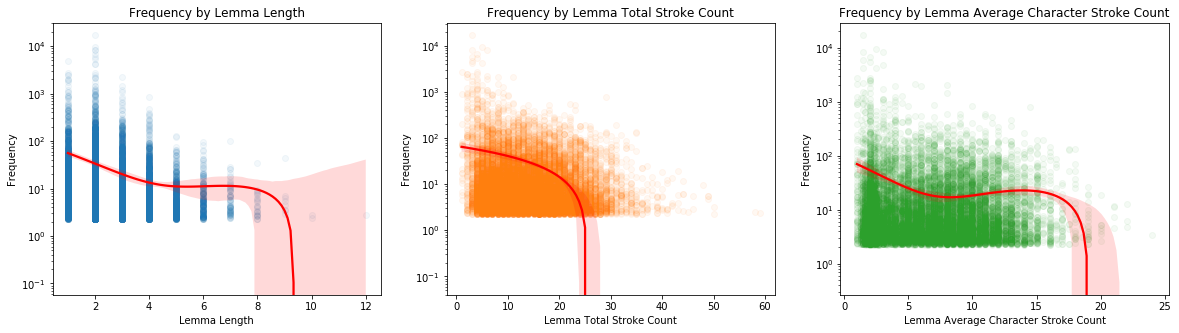

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

sns.regplot(y = nonbasic_lemma_df['frequency'], x = nonbasic_lemma_df['lemma'].str.len(), order = 3, truncate = True, ax = ax1, scatter_kws = {'alpha': 0.05}, line_kws = {"color": 'red'}).set_title('Frequency by Lemma Length')
ax1.set_xlabel('Lemma Length')
ax1.set_ylabel('Frequency')
ax1.set_yscale('log')

sns.regplot(y = nonbasic_lemma_df['frequency'], x = nonbasic_lemma_df['total_stroke_count'], order = 1, truncate = True, ax = ax2, scatter_kws = {'alpha': 0.05}, line_kws = {"color": 'red'}).set_title('Frequency by Lemma Total Stroke Count')
ax2.set_xlabel('Lemma Total Stroke Count')
ax2.set_ylabel('Frequency')
ax2.set_yscale('log')

sns.regplot(y = nonbasic_lemma_df['frequency'], x = nonbasic_lemma_df['average_character_stroke_count'], order = 3, truncate = True, ax = ax3, scatter_kws = {'alpha': 0.05}, line_kws = {"color": 'red'}).set_title('Frequency by Lemma Average Character Stroke Count')
ax3.set_xlabel('Lemma Average Character Stroke Count')
ax3.set_ylabel('Frequency')
ax3.set_yscale('log')

#fig.subplots_adjust(wspace = 0.4)
plt.show()

When weighting the importance of learning a lemma, kanji and hiragana script words should be prioritized more. Hiragana is simpler and should come first, and many of the most frequently used lemmas in Japanese are made up of only hiragana characters.

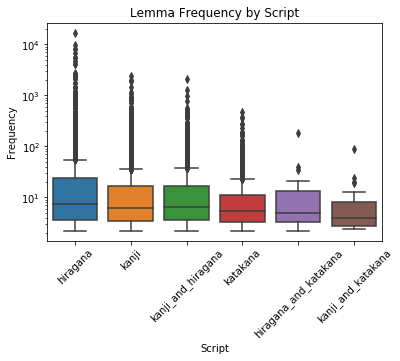

In [14]:
ax = sns.boxplot(y = nonbasic_lemma_df['frequency'], x = nonbasic_lemma_df['script'])
ax.set_title('Lemma Frequency by Script')
ax.set_xlabel('Script')
ax.set_ylabel('Frequency')
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

Additionally, while longer lemmas are generally used less frequently, the lemmas included in the JLPT n5 exam vocabulary list should be made exempt from negative weighting from length due to the type of hiragana words in this category. This is because many of these terms are easy to memorize with very little effort alongside the hiragana themselves, but also because of the frequency these terms are used.

The JLPT n5 exam has significantly longer lemmas than all other exam levels. This is likely because of the amount of foreign loan-words and modern words that were created after Japanese had split from Chinese influence and the influx of new kanji because these types of words are written out with many hiragana or katakana characters.

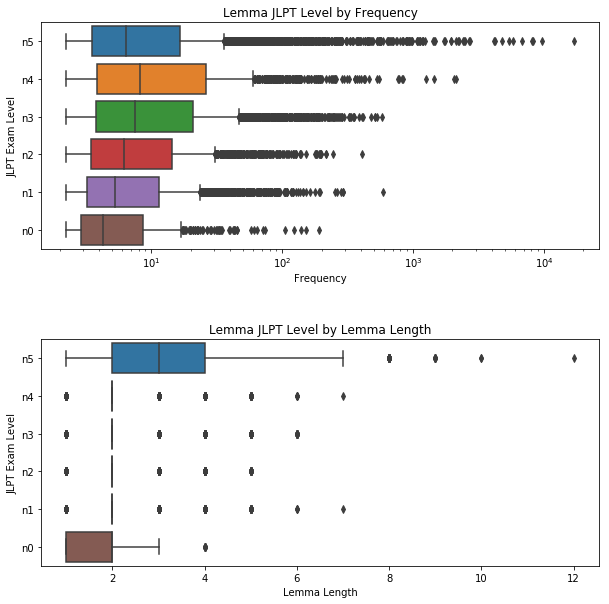

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10))

sns.boxplot(y = nonbasic_lemma_df['jlpt_level'], x = nonbasic_lemma_df['frequency'], orient = 'h', order = jlpt_exams, ax = ax1)
ax1.set_title('Lemma JLPT Level by Frequency')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('JLPT Exam Level')
ax1.set_xscale('log')

sns.boxplot(y = nonbasic_lemma_df['jlpt_level'], x = nonbasic_lemma_df['lemma'].str.len(), orient = 'h', order = jlpt_exams, ax = ax2)
ax2.set_title('Lemma JLPT Level by Lemma Length')
ax2.set_xlabel('Lemma Length')
ax2.set_ylabel('JLPT Exam Level')

fig.subplots_adjust(hspace = 0.4)
plt.show()

Noun, verb, and adjective grammar and syntactical rules should be learned freely and early on for the sake of efficiency, but conjunctions, particles, and especially auxiliary verbs will be the easiest to write and read early on. A more efficient Japanese learning order will have the largest focus on nouns, verbs, and adjective syntax, but will cover auxiliary verb, conjunction, and particle rules in earlier stages.

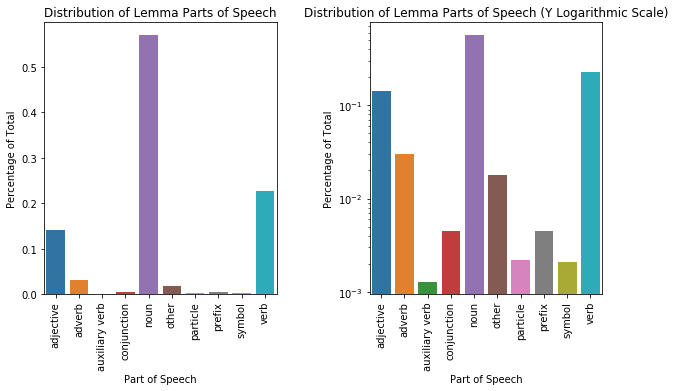

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 5))

sns.barplot(x = pos_means_df.index, y = pos_means_df['total_lemma_proportion'], ax = ax1)
ax1.set_title('Distribution of Lemma Parts of Speech')
ax1.set_xlabel('Part of Speech')
ax1.set_ylabel('Percentage of Total')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)

sns.barplot(x = pos_means_df.index, y = pos_means_df['total_lemma_proportion'], ax = ax2)
ax2.set_title('Distribution of Lemma Parts of Speech (Y Logarithmic Scale)')
ax2.set_xlabel('Part of Speech')
ax2.set_ylabel('Percentage of Total')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
ax2.set_yscale('log')

fig.subplots_adjust(wspace = 0.4)
plt.show()

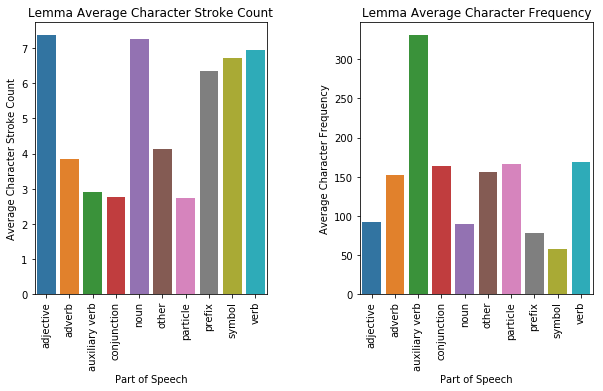

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 5))

sns.barplot(x = pos_means_df.index, y = pos_means_df['average_character_stroke_count'], ax = ax1)
ax1.set_title('Lemma Average Character Stroke Count')
ax1.set_xlabel('Part of Speech')
ax1.set_ylabel('Average Character Stroke Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)

sns.barplot(x = pos_means_df.index, y = pos_means_df['average_character_frequency'], ax = ax2)
ax2.set_title('Lemma Average Character Frequency')
ax2.set_xlabel('Part of Speech')
ax2.set_ylabel('Average Character Frequency')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)

fig.subplots_adjust(wspace = 0.4)
plt.show()